# Homework 1
## Adam Sanchez 
### MATH 4650

In [1]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sym
from sympy import init_printing
init_printing()
import math

### 1

###### a) 

$e^x \approx 1+x+\frac{x^2}{2}+\frac{x^3}{6}$

If $e^x$ is $\mathcal{O}(x)$ then we would expect $$\lim_{x\to\infty} \left|\frac{1+x+\frac{x^2}{2}+\frac{x^3}{6}}{x}\right| < \infty$$ But $$\lim_{x\to\infty} \left|\frac{1+x+\frac{x^2}{2}+\frac{x^3}{6}}{x}\right| = \lim_{x\to\infty} \left|\frac{1}{x}+1+\frac{x}{2}+\frac{x^2}{6}\right| = \infty$$

Thus $e^X$ is not $\mathcal{O}(x)$

###### b)

Let $f = x\sin\sqrt{x}$ and $g = x^{\frac{3}{2}}$ 

If $f = \theta(g)$ then $1)$ $f = \mathcal{O}(g)$ and $2)$ $g = \mathcal{O}(f)$

1) $$\lim_{x\to 0} \left|\frac{x\sin\sqrt{x}}{x^{\frac{3}{2}}}\right| 
    \approx 
    \lim_{x\to 0} \left|\frac{x^{\frac{3}{2}} -\frac{x^{\frac{5}{2}}}{6}+\frac{x^{\frac{7}{2}}}{120}}{x^{\frac{3}{2}}}\right| = 1$$ so $f = \mathcal{O}(g)$
    
2) $$\lim_{x\to 0} \left|\frac{x^{\frac{3}{2}}}{x\sin\sqrt{x}}\right| \approx \lim_{x\to 0} \left|\frac{x^{\frac{3}{2}}}{x^{\frac{3}{2}} -\frac{x^{\frac{5}{2}}}{6}+\frac{x^{\frac{7}{2}}}{120}}\right| =1$$ so $g = \mathcal{O}(f)$

Thus $f = \theta(g)$

###### c)

$$\lim_{t\to \infty} \left|\frac{e^{-t}}{\frac{1}{t^2}}\right| = \lim_{t\to \infty} \left|\frac{t^2}{e^t}\right| = 0$$

Thus $e^{-t} = o\left(\frac{1}{t^2}\right)$

###### d)
This goes to 0 so its correct 

###### e)

$$\lim_{x\to 0} \left|\frac{\frac{-x}{\log{x}}}{x}\right| = \lim_{x\to 0} \left|\frac{-x}{x\log{x}}\right| = 0$$

So $\frac{-x}{\log{x}} = o(x)$

$$\lim_{x\to 0} \left|\frac{\frac{-x}{\log{x}}}{x^2}\right| = \lim_{x\to 0} \left|\frac{-x}{x^2\log{x}}\right| = \infty$$

So $\frac{-x}{\log{x}} \neq \mathcal{O}(x^2)$

### 2

In [2]:
def bisection( f, interval, tol=1e-9, totalIters = 100):
    a,b = interval 
    fa,fb = f(a),f(b)
    oppositeSign = lambda fa,fb :  np.sign(fa)*np.sign(fb) < 0
    errorBound = lambda a,b : (b-a)/2
    midpoint = lambda a,b : a + (b-a)/2
    if not oppositeSign(fa,fb):
        raise ValueError('Function does not change sign on the interval. May not contain root on Interval')
  

    p   = midpoint(a,b)
    fp  = f(p)
    history = [p]
    f_history = [fp]
    iteration = 0

    while errorBound( fa, fb) > tol and iteration <= totalIters :
        iteration += 1

        if oppositeSign( fa, fp ):
              b,fb = p,fp
        else:
              a,fa = p,fp

        p   = midpoint(a,b)
        fp  = f(p)
        history.append(p)
        f_history.append(fp)
    return p, history, f_history

### 3

###### a)  

Let $f = 2x - \sin{x}-1$. So $f' = 2 - \cos{x}$. 

Consider the interval $[.5,1.5]$

$f'(.5) \approx 1.122$ and $f'(1.5) \approx 1.929$ so $f$ is continious on the interval

$f(.5) \approx -0.479$ and $f(1.5) \approx 1.002$ so by the IVT there exist at least one $r\in[.5,1.5]$ such that $f(r) = 0$

###### b)

Since $f$ is increasing on $(-\infty,\infty)$ we know $f$ crosses the $x$ axis only once, so there must be only one real root. 

###### c)

In [3]:
f = lambda x : 2*x - sym.sin(x) - 1
p, history, f_history = bisection(f, (.5,1.5), tol = 1e-9 )
for i,(p,fp) in enumerate( zip(history,f_history) ):
    print( "Iter {:2d}, p={:.16f}, |f(p)| = {:.2e}".format(i,p,abs(fp)))

Iter  0, p=1.0000000000000000, |f(p)| = 1.59e-1
Iter  1, p=0.7500000000000000, |f(p)| = 1.82e-1
Iter  2, p=0.8750000000000000, |f(p)| = 1.75e-2
Iter  3, p=0.9375000000000000, |f(p)| = 6.89e-2
Iter  4, p=0.9062500000000000, |f(p)| = 2.53e-2
Iter  5, p=0.8906250000000000, |f(p)| = 3.79e-3
Iter  6, p=0.8828125000000000, |f(p)| = 6.90e-3
Iter  7, p=0.8867187500000000, |f(p)| = 1.56e-3
Iter  8, p=0.8886718750000000, |f(p)| = 1.11e-3
Iter  9, p=0.8876953125000000, |f(p)| = 2.28e-4
Iter 10, p=0.8881835937500000, |f(p)| = 4.40e-4
Iter 11, p=0.8879394531250000, |f(p)| = 1.06e-4
Iter 12, p=0.8878173828125000, |f(p)| = 6.14e-5
Iter 13, p=0.8878784179687500, |f(p)| = 2.22e-5
Iter 14, p=0.8878479003906250, |f(p)| = 1.96e-5
Iter 15, p=0.8878631591796875, |f(p)| = 1.30e-6
Iter 16, p=0.8878555297851562, |f(p)| = 9.15e-6
Iter 17, p=0.8878593444824219, |f(p)| = 3.92e-6
Iter 18, p=0.8878612518310547, |f(p)| = 1.31e-6
Iter 19, p=0.8878622055053711, |f(p)| = 8.30e-9
Iter 20, p=0.8878626823425293, |f(p)| = 

###### d) 

In [4]:
fi = lambda x : (x-5)**9
p, history, f_history = bisection(fi, (4.82,5.2), tol = 1e-4 )

for i,(p,fp) in enumerate( zip(history,f_history) ):
    print( "Iter {:2d}, p={:.16f}, |f(p)| = {:.2e}.".format(i,p,abs(fp)))

Iter  0, p=5.0099999999999998, |f(p)| = 1.00e-18.


In [5]:
seq1 = (5,5,5,5,5,5,5,5,5)
coeff = np.poly(seq1)
poly = np.poly1d(coeff)
p, history, f_history = bisection(poly, (4.82,5.2), tol = 1e-4 )
for i,(p,fp) in enumerate( zip(history,f_history) ):
    print( "Iter {:2d}, p={:.16f}, |f(p)| = {:.2e}.".format(i,p,abs(fp)))

Iter  0, p=5.0099999999999998, |f(p)| = 9.31e-10.


Im honestly not sure what we are supposed to graph here. The function doesnt iterate becasue with bounds we were given to run, the errorbound is less than our tollerance level so we just end up using the midpoint as our guess for p because it is suffecently close to the true value. 

### 4

###### a)

Note that $g_{\mu}(x)$ has a critical point at $x=.5$ for all $\mu\in \mathbb{R}$. Becasue its the shape of the tent, we know $g_{\mu}(x)$ is increasing from $(-\infty,.5)$ and decreasing from $(.5,\infty)$. 

When $\mu = 0$, $g_0(0)=0$ for all $x \in [0,1]$. So $g_{\mu}(x) \in [0,1]$. 

When $\mu = 2$, $g_2(0)=0$, $g_2(.5)=1$, and $g_2(1)=0$. So $g_{\mu}(x) \in [0,1]$ 

Thus we can see that $$g_{\mu}(x) \in [0,1]$$ for $\mu \in [0,2]$



###### b)

From a) we know $g_{\mu}(x) \in [0,1]$ for all $\mu \in [0,1)$

Note $g'_{\mu}(x) = \frac{-\mu\left(x-\frac{1}{2}\right)}{\left|x-\frac{1}{2}\right|}$ So for $x \in [0,.5)$, $g'_{\mu}(x) = \mu$ and for $x \in (.5,1)$, $g'_{\mu}(x) = -\mu$ thus $\left|g'_{\mu}(x)\right| = \mu$

Becasue we know $\mu < 1$ we have a contraction. So we can use the Contraction Mapping Theorem to say that there exists a unique fixed point inside $[0,1]$



###### c)

When $\mu = 1$ the fixed points of $g_{\mu}(x)$ are $x=0$ and $x=.5$




###### d)

We know in order for there to be two fixed points $\left|g'_{\mu}(x)\right| > 1$ becasue the slope of $y=x$ is $1$. Thus $g_{\mu}(x)$ will hit $y=x$ beacuse it peaks and the falls. Further, becasue we know $\left|g'_{\mu}(x)\right| = \mu$ and $\mu \in (1,2]$ there are $2$ fixed points. The Contraction Mapping Theorem  would not apply here. 

###### e)

In [7]:
mu = 1.1
g  = lambda x : mu*( -abs(x-.5) + .5 )
x  = (math.pi)/6
N   = 11
X   = np.zeros(N)
for i in range(N):
    X[i] = x
  
    print("Iter {:4d}, x is  {:12.10f}".format(i,x,))
    x   = g(x)
  

Iter    0, x is  0.5235987756
Iter    1, x is  0.5240413468
Iter    2, x is  0.5235545185
Iter    3, x is  0.5240900297
Iter    4, x is  0.5235009674
Iter    5, x is  0.5241489359
Iter    6, x is  0.5234361705
Iter    7, x is  0.5242202125
Iter    8, x is  0.5233577663
Iter    9, x is  0.5243064571
Iter   10, x is  0.5232628972


In [8]:
mu = 1.5
g  = lambda x : mu*( -abs(x-.5) + .5 )
x2  = (math.pi)/6
N   = 11
X2   = np.zeros(N)
for i in range(N):
    X2[i] = x2
  
    print("Iter {:4d}, x is  {:12.10f}".format(i,x2,))
    x2   = g(x2)

Iter    0, x is  0.5235987756
Iter    1, x is  0.7146018366
Iter    2, x is  0.4280972451
Iter    3, x is  0.6421458676
Iter    4, x is  0.5367811985
Iter    5, x is  0.6948282022
Iter    6, x is  0.4577576967
Iter    7, x is  0.6866365451
Iter    8, x is  0.4700451824
Iter    9, x is  0.7050677736
Iter   10, x is  0.4423983395


It looks like as mu grows its harder and harder for the algorthim to find the fixed point. Which makes sense. 

Text(0.5,1,'Mu = 1.1')

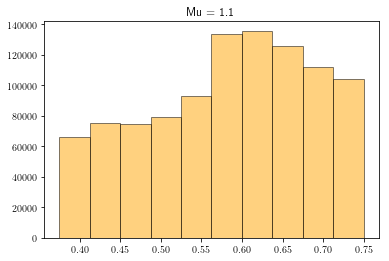

In [13]:
mu = 1.1
g  = lambda x : mu*( -abs(x-.5) + .5 )
x  = (math.pi)/6
N   = 1000000
X   = np.zeros(N)
for i in range(N):
    X[i] = x
    x   = g(x)
    
hist1 = plt.hist(X2, color='orange', edgecolor='black', alpha=0.5)
plt.title("Mu = 1.1")

Text(0.5,1,'Mu = 1.5')

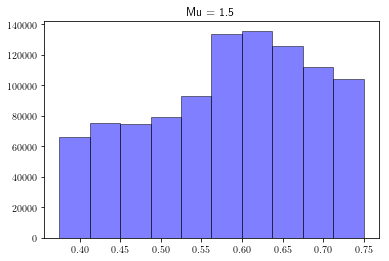

In [10]:
mu = 1.5
g  = lambda x : mu*( -abs(x-.5) + .5 )
x2  = (math.pi)/6
N   = 1000000
X2   = np.zeros(N)
for i in range(N):
    X2[i] = x2
  
    x2   = g(x2)
    
    
hist2 = plt.hist(X2, color='blue', edgecolor='black', alpha=0.5)
plt.title("Mu = 1.5")